In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


import tensorflow as tf
from utils.helper import fn_plot_tf_hist

In [52]:
###------------------------------
### global variables
##-----------------
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE) # set_seed in tf
rng= np.random.default_rng(seed= RANDOM_STATE)

N_SAMPLE  = 1000
NOISE = .2
ALPHA = .001
TEST_SIZE = .2
EPOCHS = 200 #NO. of itersation used to optimize weights
# input and output directories

params = {'legend.fontsize' : 'medium', 
          'figure.figsize' : (15, 4),
          'axes.labelsize' : 'medium',
          'axes.titlesize' : 'large',
          'xtick.labelsize' : 'medium',
          'ytick.labelsize' : 'medium',
         }
loss_hist = {} # creating an empty dictionary which will store loss and epoch later so that we can make loss curve later

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm

# plt.style.use('seaborn-v0_8-darkgrid')

plt.style.use('ggplot')

In [54]:
## Machine specific code

# physical_device = tf.config.list_physical_devices('GPU')

# if len(physical_device) >0:
    # tf.config.experimental.set_memory_growth(physical_device[0],True)


In [56]:
X, y = datasets.make_moons(n_samples = N_SAMPLE, # n_samples: how many datasets in it
                          noise = NOISE, # peportion of randommness added to data so that it matched to real life data , without noise it becomes perfect half circle in moon dataset
                          shuffle = True, 
                          random_state = RANDOM_STATE)
X.shape, y.shape

((1000, 2), (1000,))

In [57]:
X_train, X_test, y_train, y_test=   train_test_split(X,y , random_state= RANDOM_STATE, stratify=y, test_size= TEST_SIZE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

- tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
    **kwargs
)

In [61]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)), # input layer ,units=no of neurons =2 
    # we can also activate in another line
    tf.keras.layers.Dense(5,activation ='relu', name= 'fc_1'), # no of neurons=5, name= fully connected layer, not mandatory , just for naming
    # no link is broken between layers so they are called fully connected layers
    tf.keras.layers.Dense(5,activation ='relu', name= 'fc_2'), # no of neurons=5
    tf.keras.layers.Dense(4,activation ='relu', name= 'fc_3'), # no of neurons=4
    tf.keras.layers.Dense(3,activation ='relu', name= 'fc_4'), # no of neurons=3
    tf.keras.layers.Dense(2, name= 'Output') # no of neurons=2 , no activation as it is output layer ## if no activation is applied (ie. "linear" activation: a(x) = x).
    
])

In [62]:
prediction= model(X_train[:1]).numpy() # just for checking
prediction.sum()

0.0

In [63]:
tf.nn.softmax(prediction).numpy().sum()

1.0

In [64]:
# - weights 2*5 

In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc_1 (Dense)                    │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_4 (Dense)                    │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92 (368.00 B)

 Trainable params: 92 (368.00 B)

 Non-trainable params: 0 (0.00 B)

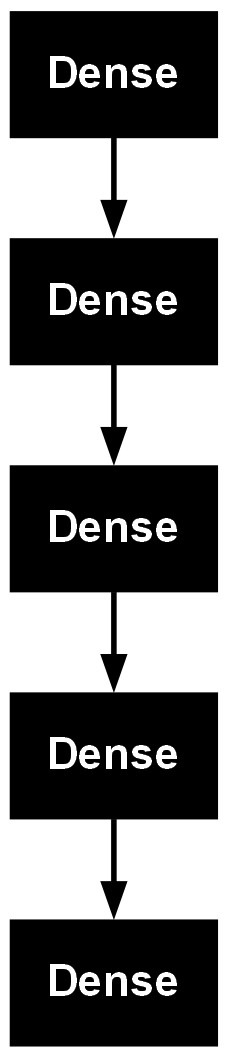

In [66]:
tf.keras.utils.plot_model(model, "my_first_model.png")

In [67]:
# define loss function
#criterias: on what we are defining loss , 
#sparse means: input is column vector, 
#check y and y_pred same or not
# from_logits = True means i did not put sigmoid or softmax at the last layer, google will automatically handle it.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [68]:
loss_fn(y_train[:1], prediction).numpy()

0.6931472

In [69]:
#for classification : metrics = accuracy
model.compile(optimizer = 'adam', loss= loss_fn, metrics= ['accuracy'])

In [70]:
# model fitting 
# supply x, y and validation data , at each epoch check how model is doing on validation

history =  model.fit(x= X_train, y=y_train, validation_data= [X_test, y_test], epochs= EPOCHS)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5178 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5180 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5178 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5178 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5178 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5178 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5180 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5178 - loss: 0.6931 - val_accuracy: 0.5000 - 

In [73]:
# keep eye on loss , epoch after epoch it should go down , no harm at one or two places
# trainng loss goes up then problem
# even spikes come then check your model
# validation loss coming up then we think it is overfitting
# like if we keep epoch =2000 here then overfitting

In [74]:
history.history.keys() # tensor flow output is a dictionary, here: history.history, history is object
# .history is an attribute of history 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [76]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_model',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params']

In [78]:
history.history  
#dictionary

{'accuracy': [0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.48750001192092896,
  0.47999998927116394,
  0.47999998927116394,
  0.48500001430511475,
  0.48249998688697815,
  0.48249998688697815,
  0.47999998927116394,
  0.48500001430511475,
  0.48500001430511475,
  0.48500001430511475,
  0.48500001430511475,
  0.48500001430511475,
  0.48500001430511475,
  0.48500001430511475,
  0.48500001430511475,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.47999998927116394,
  0.4

,accuracy,loss,val_accuracy,val_loss
0,0.5,0.693250,0.5,0.693158
1,0.5,0.693179,0.5,0.693154
2,0.5,0.693175,0.5,0.693151
3,0.5,0.693174,0.5,0.693149
4,0.5,0.693174,0.5,0.693148


<Axes: >

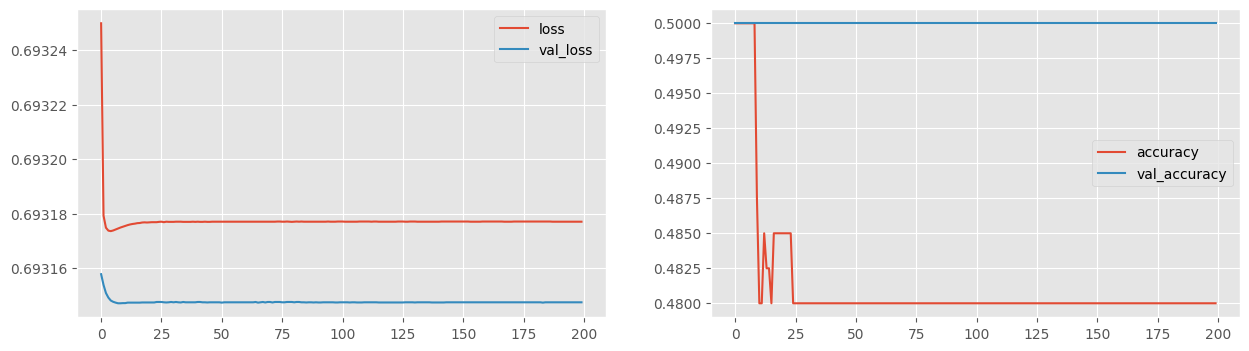

In [79]:
hist_df= pd.DataFrame(history.history)
display(hist_df.head())
fig, ax = plt.subplots(1,2)

# the required plot
hist_df.plot(y= ['loss','val_loss'], ax= ax[0])
hist_df.plot(y= ['accuracy','val_accuracy'], ax= ax[1])

In [82]:
fn_plot_tf_hist(hist_df=hist_df) #Using function

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Error in callback <function _draw_all_if_interactive at 0x00000176FA030540> (for post_execute), with arguments args (),kwargs {}:


TypeError: only length-1 arrays can be converted to Python scalars

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1500x600 with 2 Axes>

### - model retains the weights from the last epoch, even if those weights do not correspond to the highest validation accuracy.

In [ ]:
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred.argmax(axis=1))

In [ ]:
cm = confusion_matrix(y_train, y_pred.argmax(axis=1))
plost = ConfusionMatrixDisplay(cm, display_labels = [0,1])
fig, ax = plt.subplots(figsize = (4,4))

plost.plot(ax = ax, cmap = 'Blues', colorbar = False)
ax.grid(False)

In [ ]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred.argmax(axis = 1))

In [ ]:
cm = confusion_matrix(y_test, y_pred.argmax(axis = 1))
plat = ConfusionMatrixDisplay(cm, display_labels = [0, 1])
fig, ax =plt.subplots(figsize = (4,4))

plat.plot(ax = ax, cmap = 'Blues', colorbar = False)
ax.grid(False)